In [4]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from subprocess import check_output

# TensorFlow 2.x version of the imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

# Print the contents of the data/ directory
print(check_output(["ls", "data/"]).decode("utf8"))


In [5]:
num_of_classes = 10
epochs = 20

In [6]:
train_df = pd.read_csv('data/fashion-mnist_train.csv', sep=',')
test_df = pd.read_csv('data/fashion-mnist_test.csv', sep=',')

In [7]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype= 'float32')

In [10]:
x_train = train_data[:,1:]/255 #? We are rescaling it
y_train = train_data[:,0]

x_test = test_data[:,1:]/255
y_test = test_data[:,0]

In [17]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.2, random_state=12345)

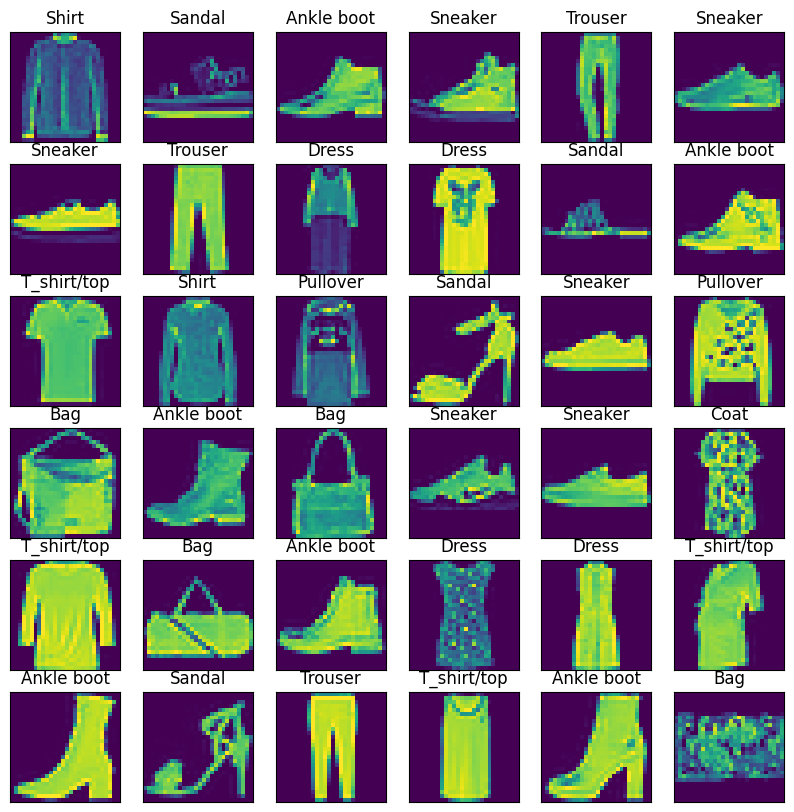

In [12]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [13]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows, image_cols, 1)

In [18]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [19]:
cnn_model = Sequential([
  Conv2D(filters = 32, kernel_size=3, activation='relu', input_shape=image_shape),
  MaxPooling2D(pool_size=2),
  Dropout(0.2),
  Flatten(),
  Dense(32, activation='relu'),
  Dense(10, activation='softmax')
])

In [ ]:
cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.1),
    metrics=['accuracy']
)


In [33]:
history = cnn_model.fit(
  x_train,
  y_train,
  batch_size=256,
  epochs=10,
  verbose=1,
  validation_data=(x_validate, y_validate),
)

Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9226 - loss: 0.2303 - val_accuracy: 0.8919 - val_loss: 0.3522
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9293 - loss: 0.1933 - val_accuracy: 0.8975 - val_loss: 0.3543
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9399 - loss: 0.1605 - val_accuracy: 0.8988 - val_loss: 0.3536
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9461 - loss: 0.1422 - val_accuracy: 0.8982 - val_loss: 0.3844
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9530 - loss: 0.1251 - val_accuracy: 0.8992 - val_loss: 0.3809
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9522 - loss: 0.1313 - val_accuracy: 0.8995 - val_loss: 0.4047
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9519 - loss: 0.1258 - val_accuracy: 0.8931 - val_loss: 0.4321
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9560 - loss: 0.1148 - val_accu

In [34]:
score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.4348
Test Accuracy : 0.9024
